# Statistical analysis

## Reading the data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

label = ['South West', 'South East', 'Greater London']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']
deficit_column_energy = ['SouthWest.Deficit (MWh)','SouthEast.Deficit (MWh)','GreaterLondon.Deficit (MWh)']
cumul_deficit_column_energy = ['SouthWest.CumulDeficit (MWh)','SouthEast.CumulDeficit (MWh)','GreaterLondon.CumulDeficit (MWh)']
excess_column_energy = ['SouthWest.Excess (MWh)','SouthEast.Excess (MWh)','GreaterLondon.Excess (MWh)']
cumul_excess_column_energy = ['SouthWest.CumulExcess (MWh)','SouthEast.CumulExcess (MWh)','GreaterLondon.CumulExcess (MWh)']


df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
    df_proc[deficit_column_energy[i]] = np.maximum(0,df_proc_sheet['Demand MWh']-df_proc_sheet['Solar MWh']-df_proc_sheet['Wind MWh'])
    df_proc[cumul_deficit_column_energy[i]] = df_proc[deficit_column_energy[i]].cumsum()
    df_proc[excess_column_energy[i]] = np.maximum(0,df_proc_sheet['Solar MWh']+df_proc_sheet['Wind MWh']-df_proc_sheet['Demand MWh'])
    df_proc[cumul_excess_column_energy[i]] = df_proc[excess_column_energy[i]].cumsum()

df_proc = df_proc.set_index('date')

## Direct plots

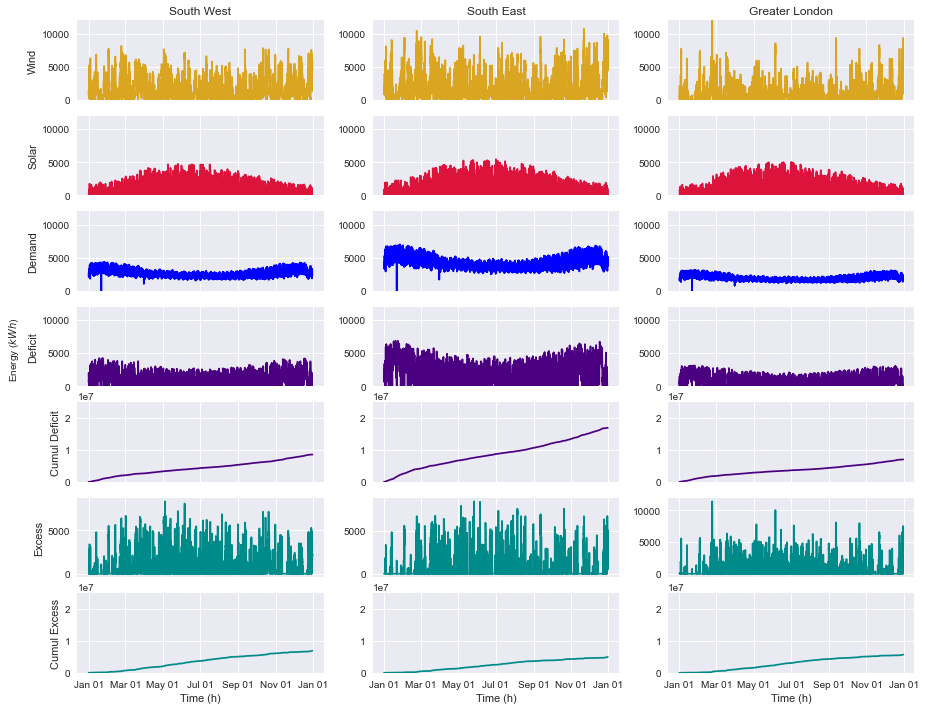

In [5]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(7,3,figsize=(15,12), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    y = df_proc[wind_column_energy[i]]
    axx.set_ylim(0,12000)
    axx.plot(y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel("Wind")
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    axx.set_ylim(0,12000)
    y = df_proc[solar_column_energy[i]]
    axx.plot(y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel("Solar")
for i in [0,1,2]:
    axx = ax[2][i]
    y = df_proc[demand_column_energy[i]]
    axx.plot(y,label=label[i],color=demand_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Demand")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[3][i]
    y = df_proc[deficit_column_energy[i]]
    axx.plot(y,label=label[i],color=deficit_color)
    axx.set_ylim(0,12000)
    if i == 0:
        axx.set_ylabel("Deficit")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[4][i]
    y = df_proc[cumul_deficit_column_energy[i]]
    axx.plot(y,label=label[i],color=deficit_color)
    axx.set_ylim(0,25000000)
    if i == 0:
        axx.set_ylabel("Cumul Deficit")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[5][i]
    y = df_proc[excess_column_energy[i]]
    axx.plot(y,label=label[i],color=excess_color)
    if i == 0:
        axx.set_ylabel("Excess")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[6][i]
    y = df_proc[cumul_excess_column_energy[i]]
    axx.plot(y,label=label[i],color=excess_color)
    axx.set_ylim(0,25000000)
    if i == 0:
        axx.set_ylabel("Cumul Excess")
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
    axx.set_xlabel('Time (h)')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
fig.text(0.06, 0.5, energy_label, va='center', rotation='vertical')
plt.savefig("processed_data_hourly_wind_speed_solar_demand_energy.png")

## Empirical cumulative distribution functions

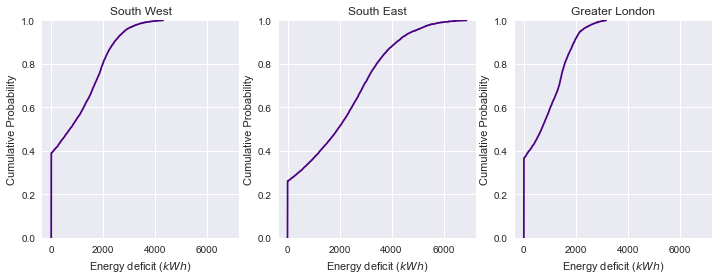

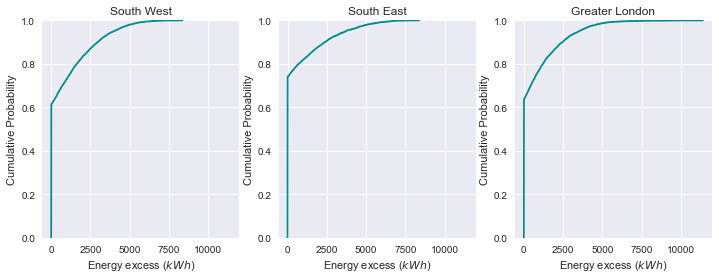

In [8]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(1,3,figsize=(12,4), sharex=True)
for i in [0,1,2]:
    axx = ax[i]
    axx.title.set_text(label[i])
    axx.set_xlabel(deficit_label2)
    axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df_proc, x=deficit_column_energy[i],color=deficit_color)

mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(1,3,figsize=(12,4), sharex=True)
for i in [0,1,2]:
    axx = ax[i]
    axx.title.set_text(label[i])
    axx.set_xlabel(excess_label2)
    axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df_proc, x=excess_column_energy[i],color=excess_color)